In [86]:
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
import os
from skimage import io

In [91]:
#Empty List which the images can be added to for saving purposes-
InputImList=[]

## Adding blur to an image-

In [4]:
def twodimgaus(spread):
    x=np.linspace(-5,5,101)
    y=np.linspace(-5,5,101)
    x=x[1:101]
    y=y[1:101]
    [X,Y]=np.meshgrid(x,y)
    Gaus2d1=1/(spread*2*np.pi)**0.5*np.exp(-spread/2*X**2-spread/2*Y**2)
    return(Gaus2d1)

def FTconvolve(array, PSF):
    #To convolve take the fourier transform of each and multiply them together-
    
    FTtest=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(array)))
    FTPSF=np.fft.fftshift(np.fft.fft2(np.fft.fftshift(PSF)))

    ConvTest=FTtest*FTPSF

    #To get the resulting image take the inverse ft and multiply back-
    ConvArray=np.real(np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(ConvTest))))

    #There's probably a more mathematically sound way to do this but renormlize to maintain the orignial scale of array-
    #Assuming all arrays are positive-
    
    ConvArray=ConvArray/np.max(ConvArray)*np.max(array)
    
    f=plt.imshow(ConvArray)
    plt.title("Blurred Image")
    plt.colorbar(f)
    plt.show()
    
    return(ConvArray)

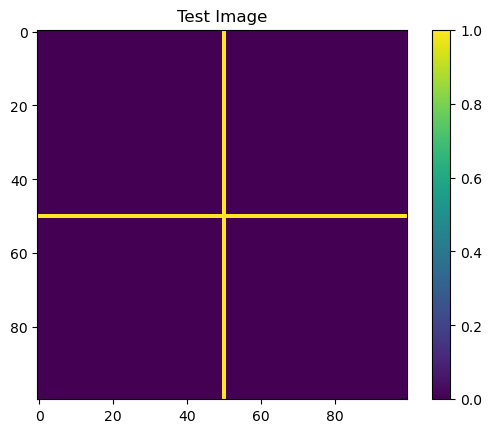

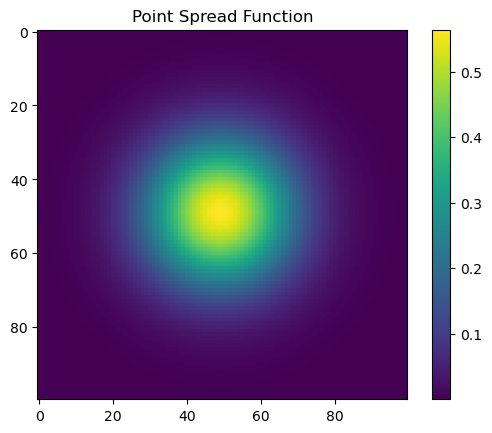

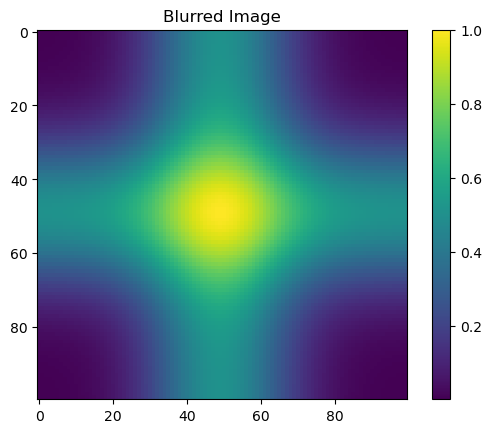

In [7]:
#Generate Test Array-
testarray=np.zeros((100,100))
testarray[:,50]=1
testarray[50,:]=1

plt.title("Test Image")
f=plt.imshow(testarray)
plt.colorbar(f)
plt.show()

#Generate PSF, using a 2d symetric gausian
#PSF size can be changed through adjusting the parameter in the line below-
psf=twodimgaus(0.5)
plt.title("Point Spread Function")
g=plt.imshow(psf)
plt.colorbar(g)
plt.show()

test1= FTconvolve(testarray, psf)

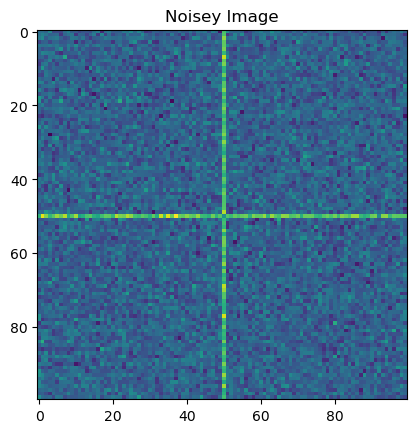

In [8]:
#Adding Noise to an image-

#Can be scanged by changing mean- 0 currently, or stdev-0.2 currently 
noiseyim=testarray+np.random.normal(0,0.2,(100,100))

plt.title("Noisey Image")
plt.imshow(noiseyim)
plt.show()

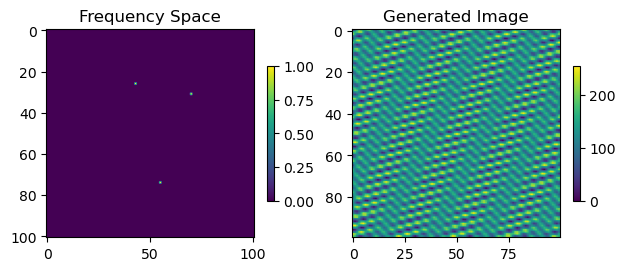

In [77]:
#Generating Frequency Based Images-

#This works by placing points in frequency space then taking the fourier transform to get frequency images
frequency_space=np.zeros((101,101))

#Number of frequency terms to add-
nufreq=3
for i in range(nufreq):
    #Randomly adding frequency terms-
    frequency_space[random.randint(25, 75),random.randint(25, 75)]=1
    
    #Adding periodically-
#     freqchange=5*(i+1)+20
#     frequency_space[60,freqchange]=1

#Can also be added manually like so-
# frequency_space[60,50]=1

#Image is then shifted back to image space with esulting frequencies-
space=np.real(np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(frequency_space))))
space=space-np.min(space)
space=space/np.max(space)
space=space[:100,:100]*255
    
fig, (ax1, ax2) = plt.subplots(1, 2)
f=ax1.imshow(frequency_space)
ax1.set_title("Frequency Space")
plt.colorbar(f, ax=ax1, shrink=0.3)
g=ax2.imshow(space)
ax2.set_title("Generated Image")
plt.colorbar(g, ax=ax2, shrink=0.3)
plt.tight_layout()
plt.show()

#Add to list to save-
InputImList.append(space)

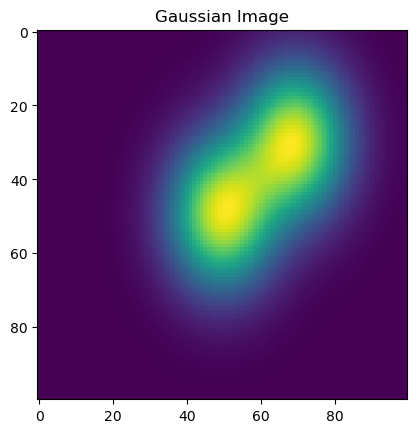

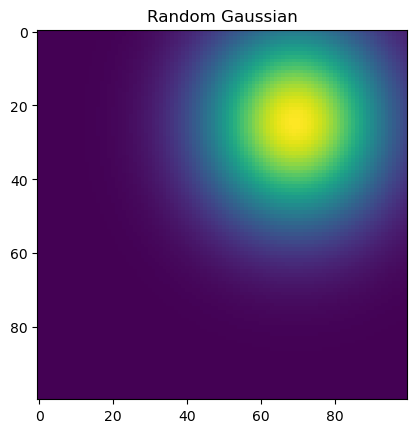

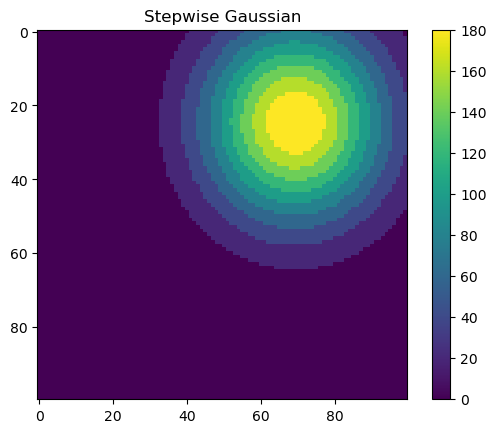

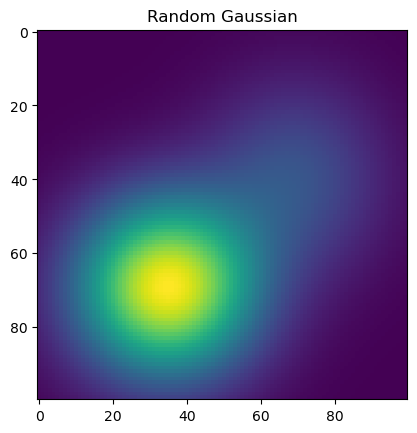

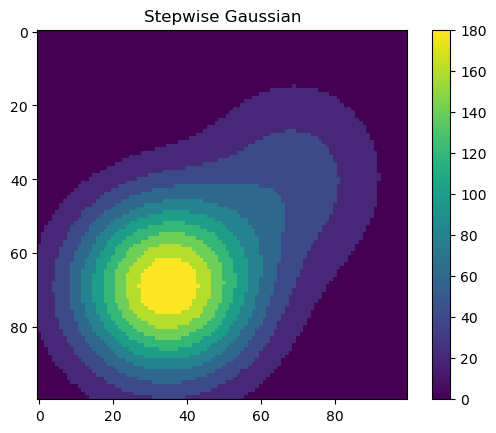

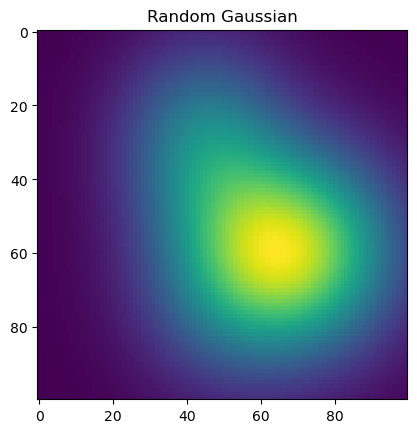

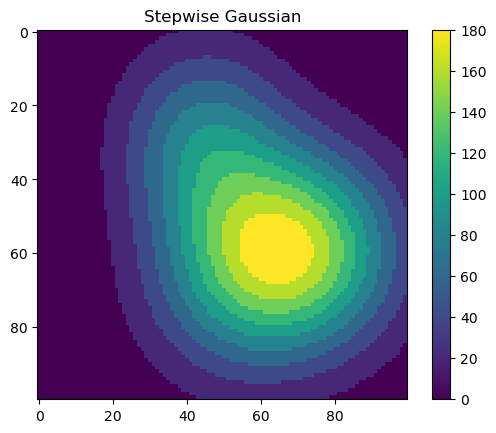

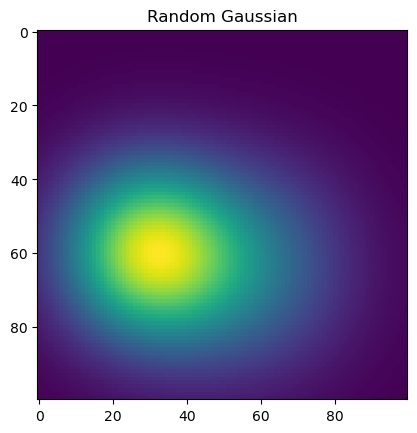

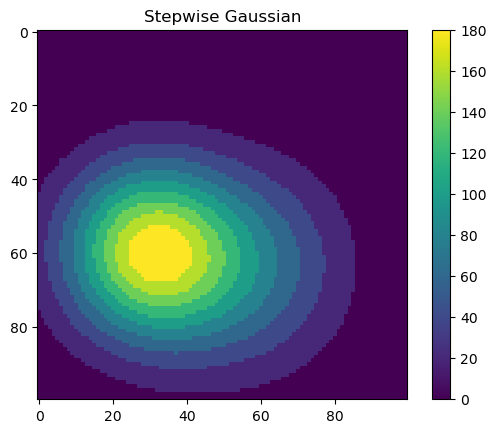

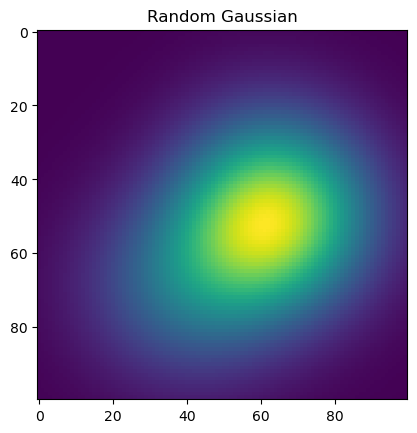

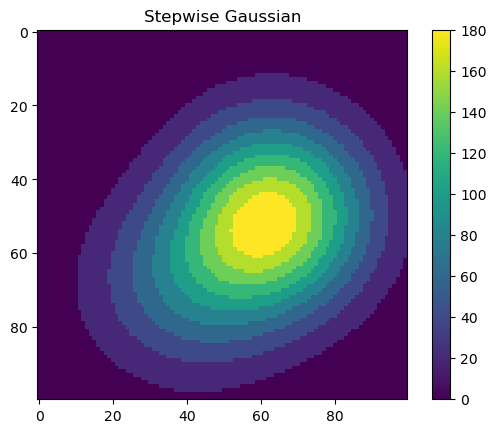

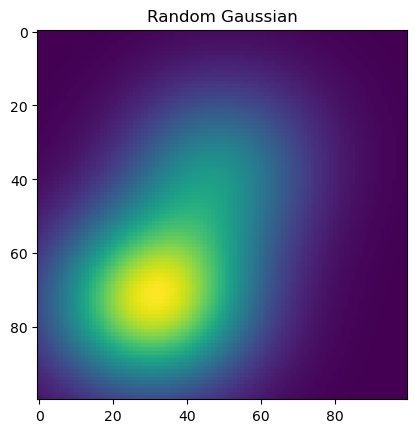

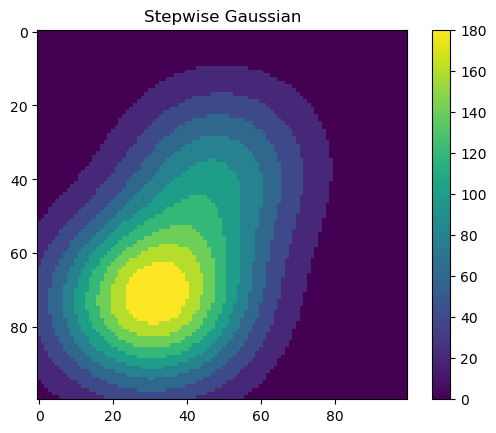

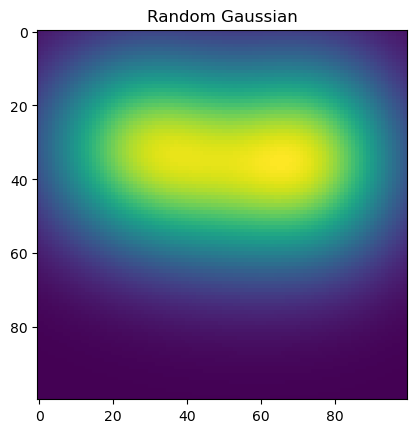

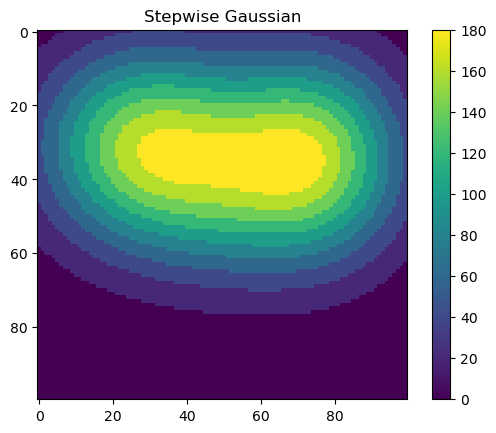

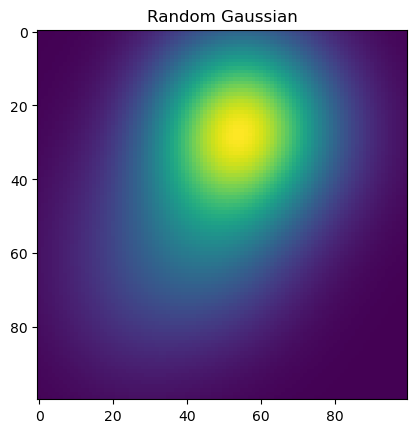

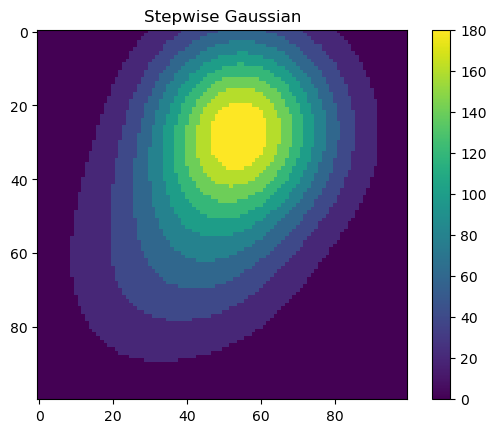

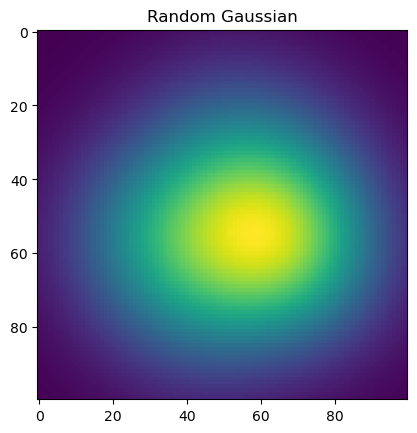

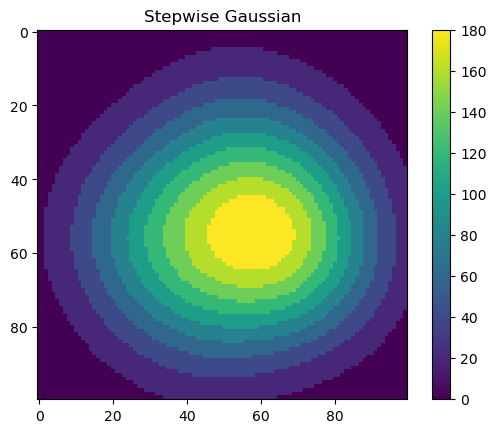

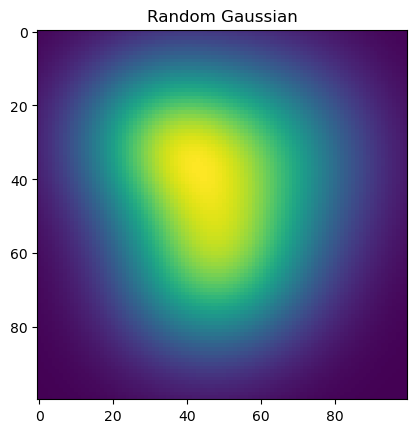

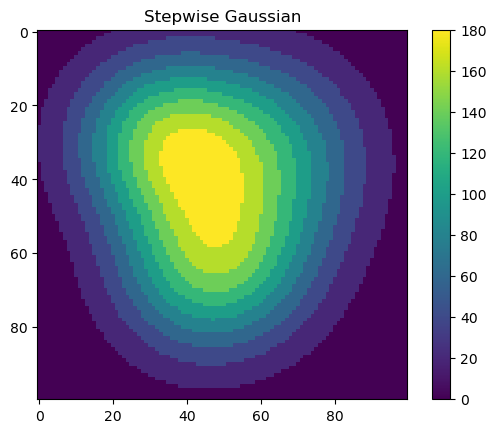

In [73]:
#Gaussian functions-

#Manually adjustable Gaussian-
x=np.linspace(-5,5,100)
y=np.linspace(-5,5,100)
[X,Y]=np.meshgrid(x,y)
Gaus2d1=np.exp(-0.5*X**2- 0.25*Y**2)
Gaus2d2=np.exp(-0.5*(X-2)**2- 0.25*(Y+2)**2)
Gaus2d=Gaus2d1+Gaus2d2
plt.title("Gaussian Image")
plt.imshow(Gaus2d)
plt.show()


#Lil Gaussy Guys-
#Random gaussian functions-
x=np.linspace(-10,10,100)
y=np.linspace(-10,10,100)
[X,Y]=np.meshgrid(x,y)

for i in range(10):
    gausarray=np.zeros((100,100))
    for j in range(i+1):
        Gaus2d=np.exp(-1/random.randint(20,30)*(X+random.randint(-5,5))**2- 1/random.randint(20,30)*(Y+random.randint(-5,5))**2)
        gausarray=gausarray+1/random.randint(1,10)*Gaus2d   
    gausarray=200*gausarray/np.max(gausarray)
    noise = np.random.normal(0,5,(100,100))
    #Add noise by uncommenting the following line-
    #gausarray=gausarray+noise
    plt.title("Random Gaussian")
    plt.imshow(gausarray)
    plt.show()
    InputImList.append(gausarray)

    #Create stepwise gaussian function-
    intermarray=np.zeros((100,100))
    stepgaussian=np.zeros((100,100))
    for k in range(10):
        intermarray=np.where(gausarray<20*k, 20*k, gausarray)
        stepgaussian=np.where(intermarray>20*k, 20*k, stepgaussian)
    #Add noise by uncommenting the following line-
    #stepgaussian=stepgaussian+noise
    plt.title("Stepwise Gaussian")
    f=plt.imshow(stepgaussian)
    plt.colorbar(f)
    plt.show()
    InputImList.append(stepgaussian)



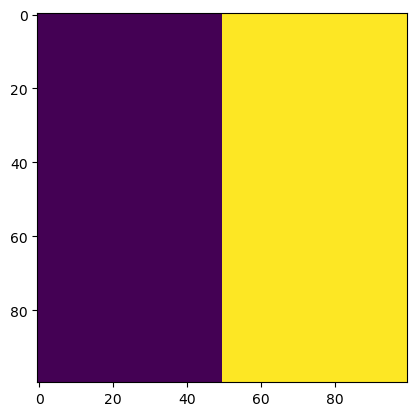

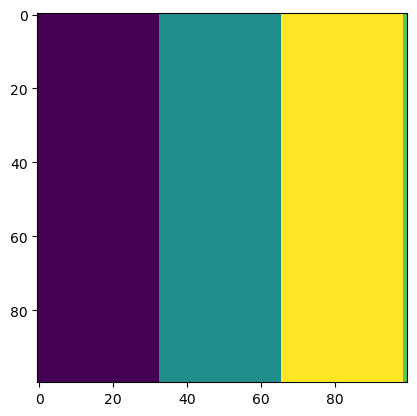

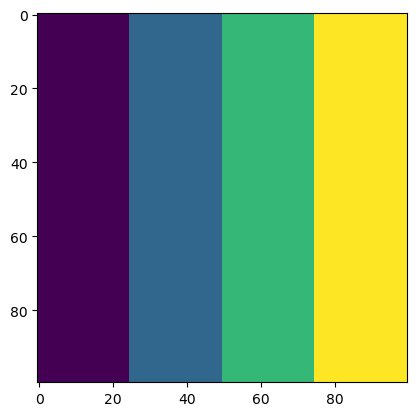

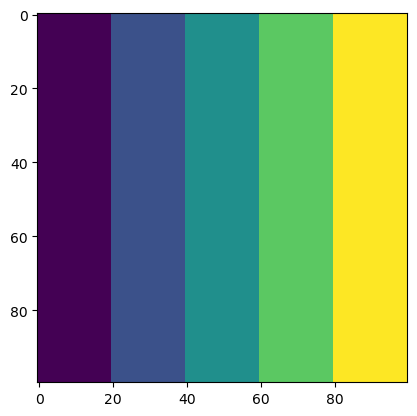

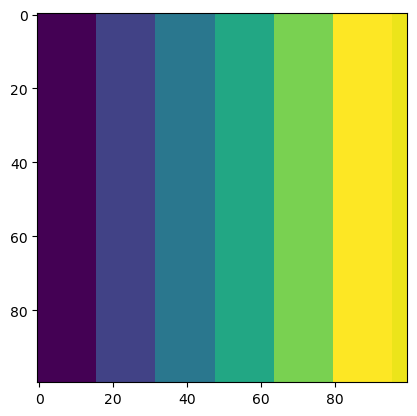

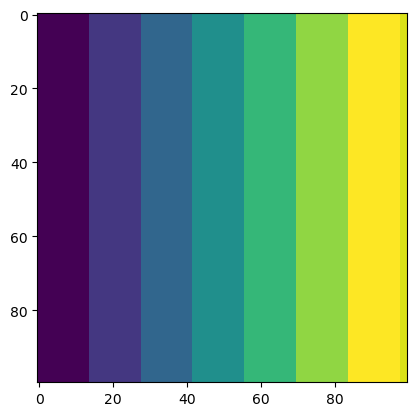

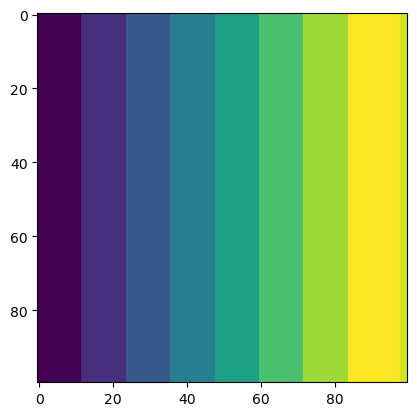

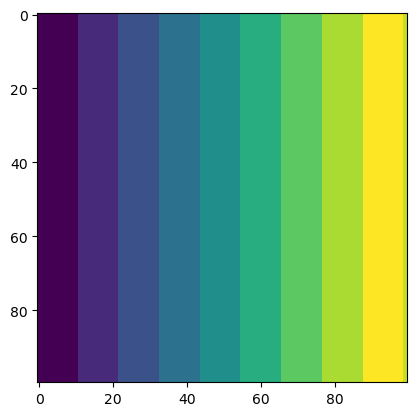

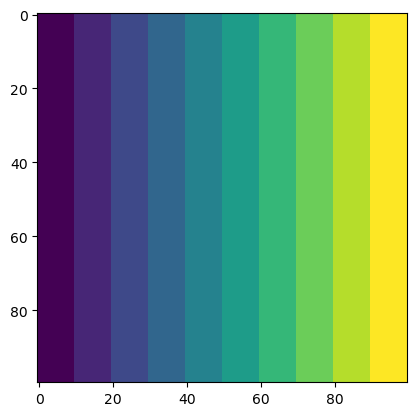

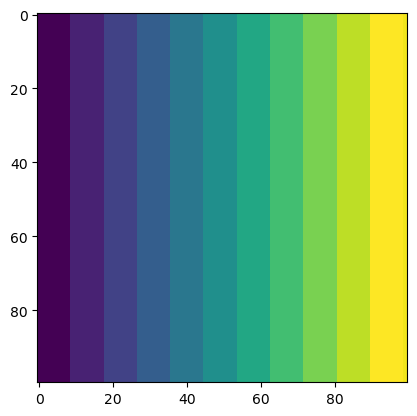

In [78]:
#Stripes of varying size-
tester_array=np.ones((100,100))
tester_array = tester_array.astype(np.uint8)

#a nice way to do this may be steps, varying the value range each time-
for i in range(10):
    subdivs=i+1
    Stepsize=int(np.floor(255/(subdivs+1)))
    Stepshape=int(np.floor(100/(subdivs+1)))
    for j in range(subdivs):
        step=(j+1)*Stepsize
        tester_array[:,(j+1)*Stepshape:(j+2)*Stepshape]=step
    plt.imshow(tester_array)
    plt.show()
    InputImList.append(np.array(tester_array).astype(np.uint8))

    

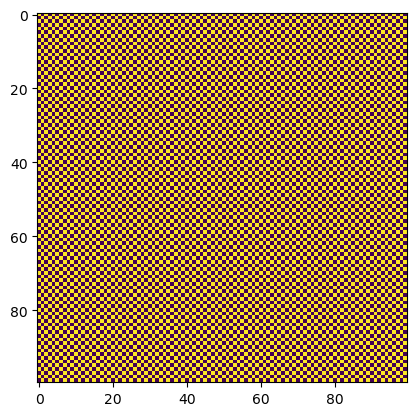

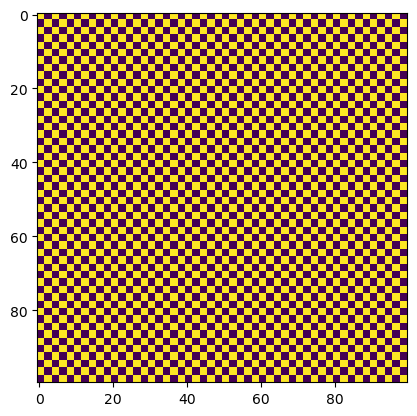

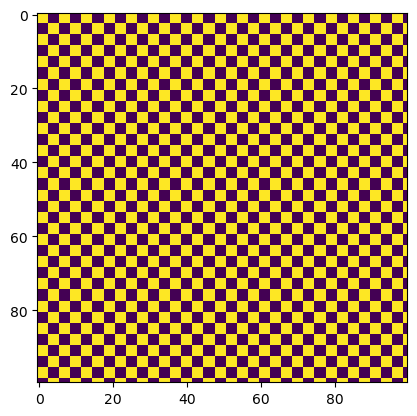

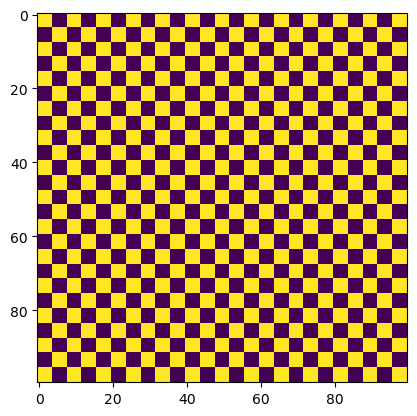

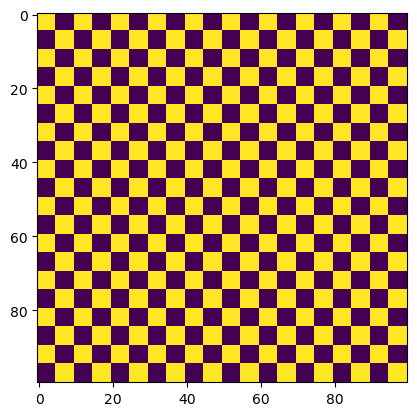

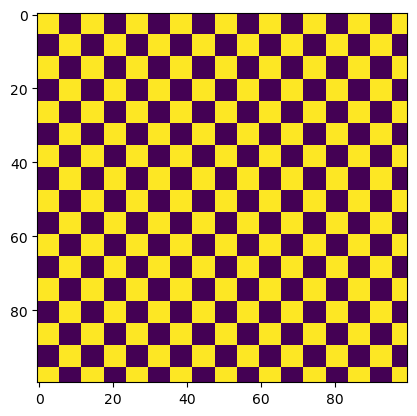

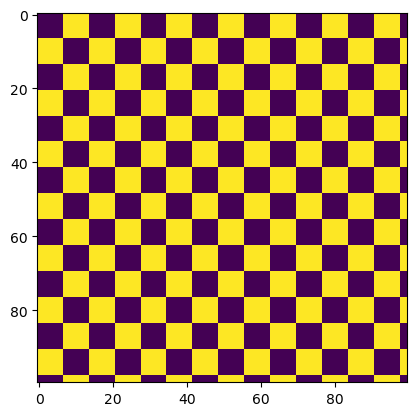

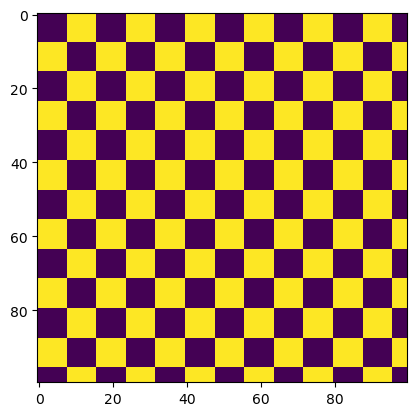

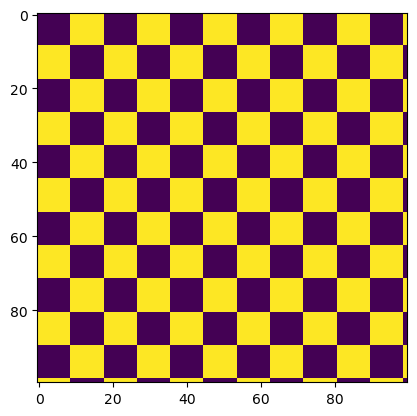

In [80]:
#Checkerboard function-
arraysize=120
for r in range(9):
    board=np.zeros((arraysize,arraysize))+100
    checkersize=r+1
    #Assuming square-
    steps=int(np.floor(arraysize/checkersize))
    count=0
    for i in range(steps):
        if steps%2==0:
            count=count+1
        for j in range(steps):
            #determine if the count is even or odd to determine fill
            square=count%2
            #For Solid Fill-
            fill=square*255
            #For Gradient Fill-
            #fill=10*square*(255-i+j)
            board[j*checkersize:(j+1)*checkersize,i*checkersize:(i+1)*checkersize]=fill
            count=count+1
    
    boardout=board[:100,:100]
    InputImList.append(boardout)
    plt.imshow(boardout)
    plt.show()


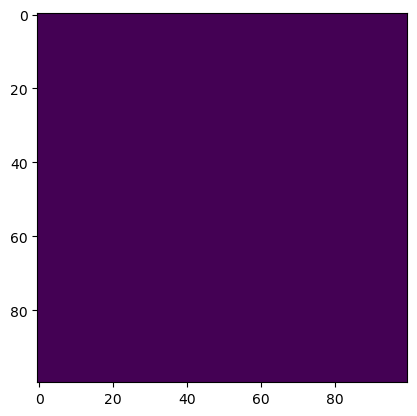

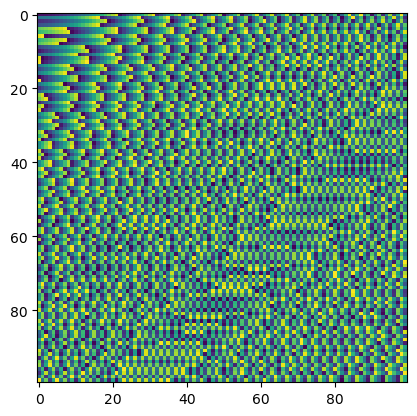

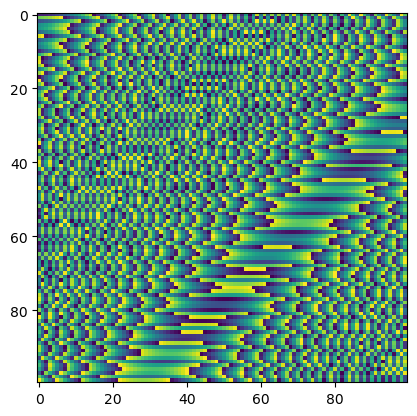

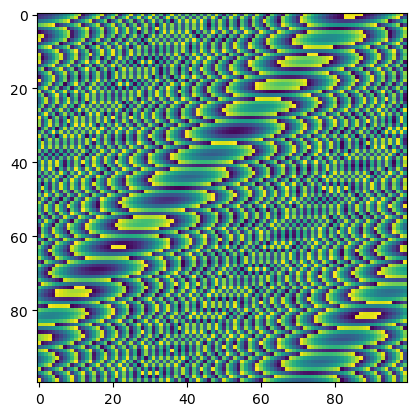

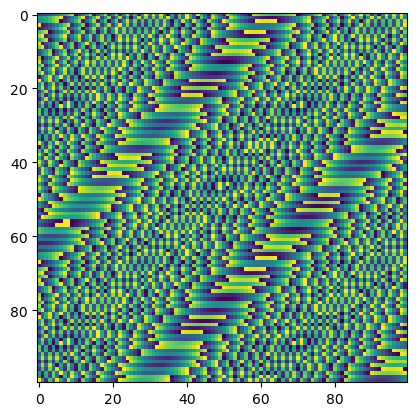

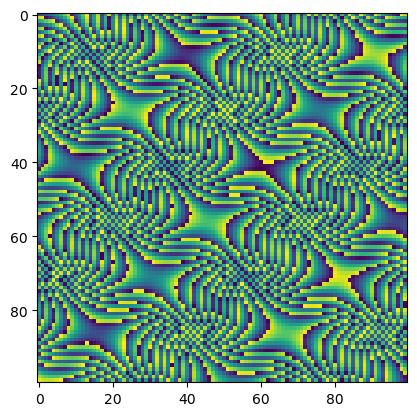

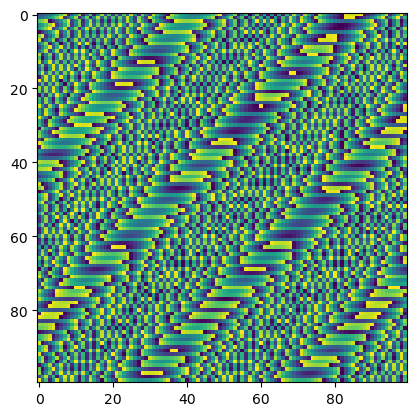

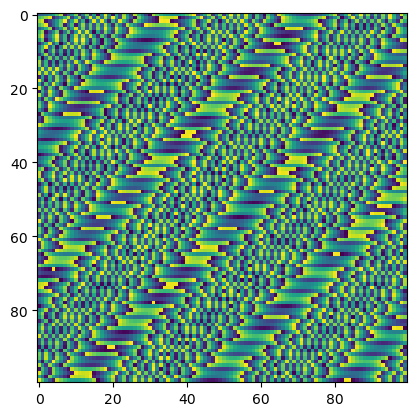

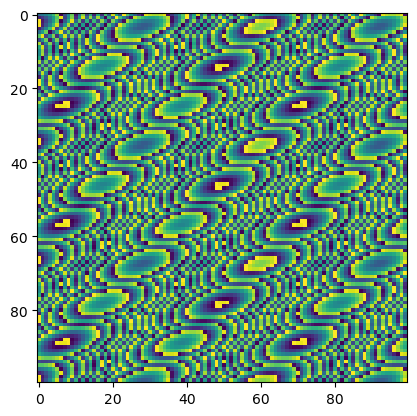

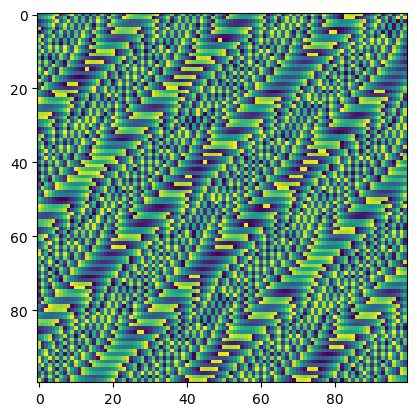

In [82]:
#Gradient function-
plane2= np.zeros((100,100))
    
for i in range(10):
    start=i*10
    for k in range(100):
        #Params can be adjusted to change gradient style
        start=start+i
        for j in range(100):
            #Uncomment following line to get real funky!
            start=start+i*(k+j)
            plane2[k,j]=start
    plt.imshow(plane2.astype(np.uint8))
    plt.show()
    InputImList.append(plane2.astype(np.uint8))

20


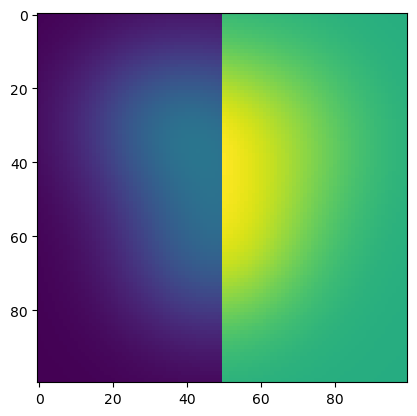

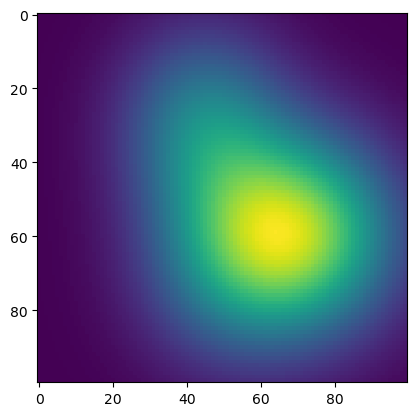

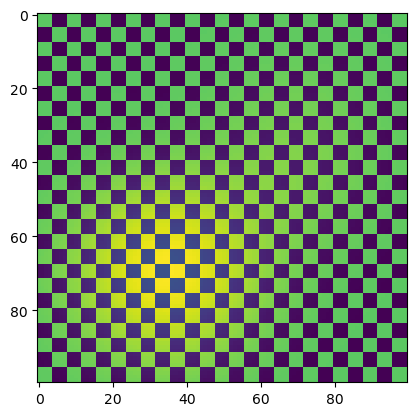

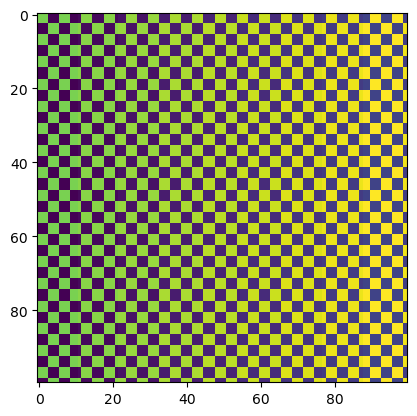

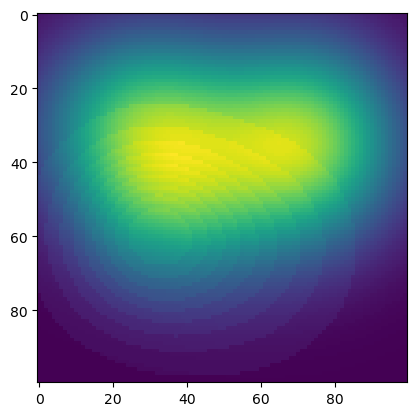

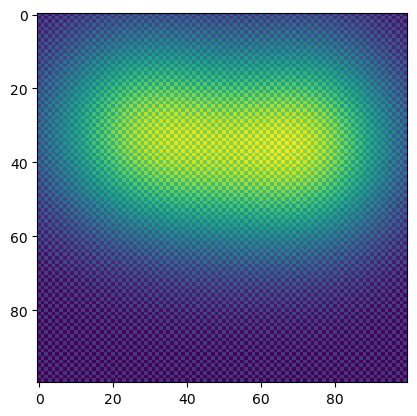

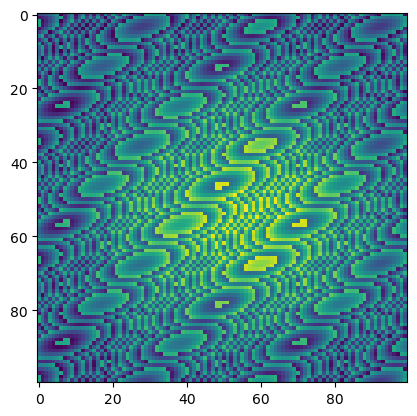

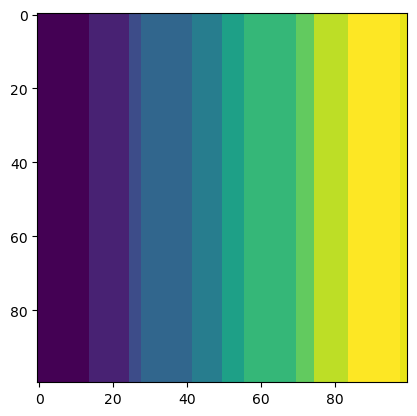

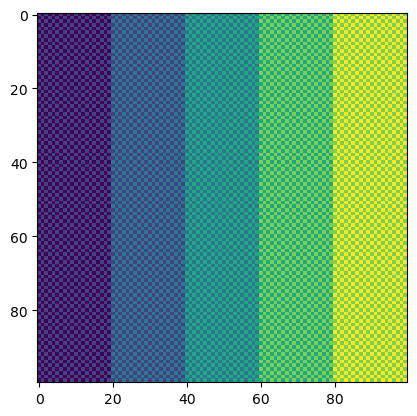

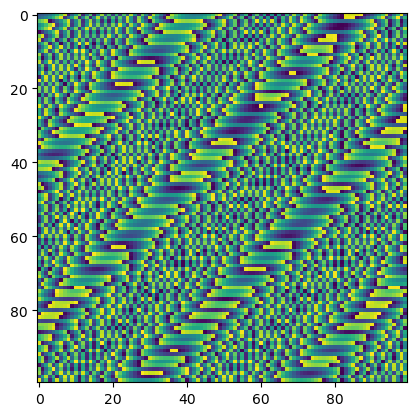

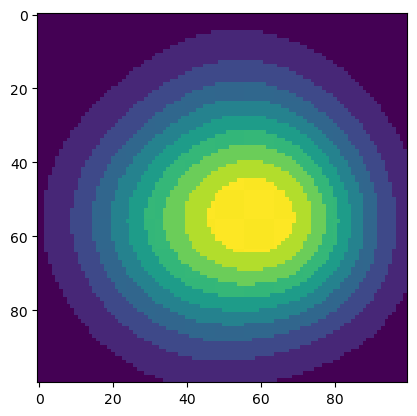

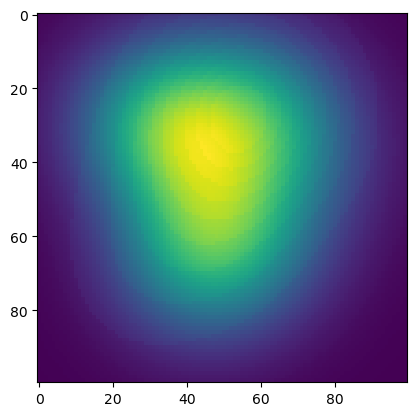

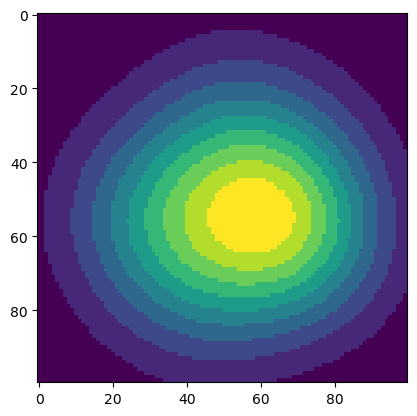

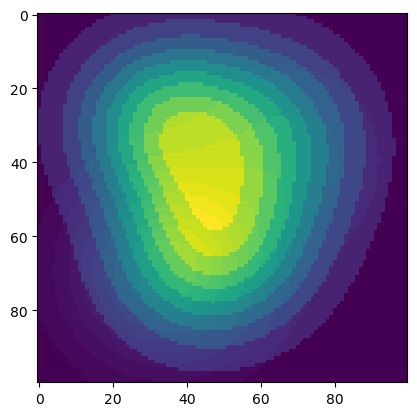

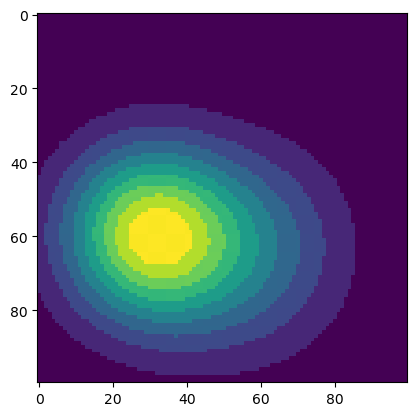

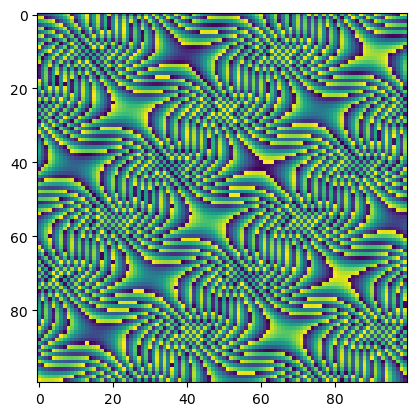

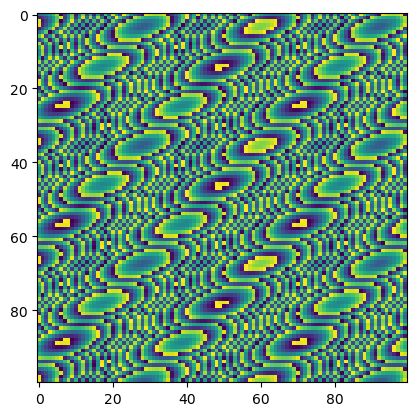

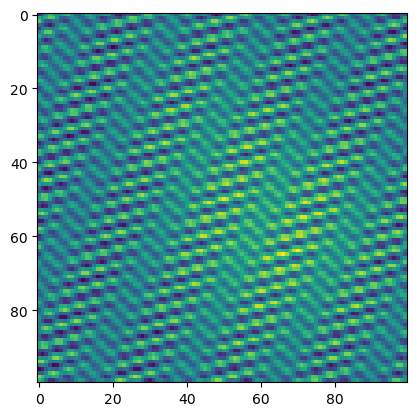

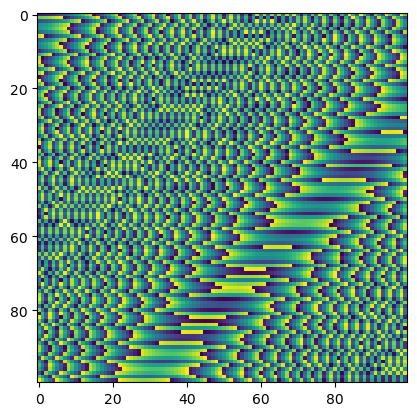

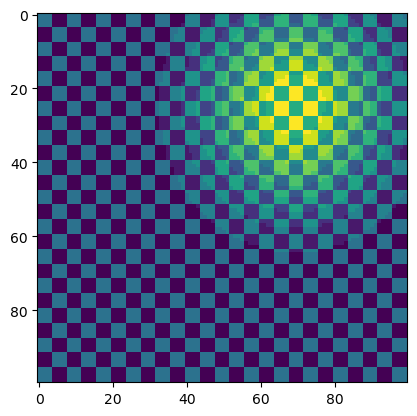

In [93]:
#Saving simulated texture images-
#All simulated ims size- 100x100 bound from 0-255:

print(len(InputImList))

for i in range(len(InputImList)):
    fixarray=InputImList[i]
    plt.imshow(fixarray)
    plt.show()
    fixarray=np.where(fixarray<0,0,fixarray)
    im = Image.fromarray(fixarray.astype(np.uint8))
    #Count can be adjusted later if its desired to save additional images to avoid overwriting the old ones-
    count=0
    filename="Textim"+str(i+count)+".png"
    savepath=os.path.join(r"C:\Users\justinamb\Desktop\SimTexts",filename)
    im1 = im.save(savepath)
                


In [88]:
#Load imageset back in-
dir_path = r"C:\Users\justinamb\Desktop\SimTexts"

# Change the directory 
os.chdir(dir_path) 

imageset=[]
# iterate through all file 
for file in os.listdir(): 
    # Check whether file is in text format or not 
    pic = np.array(io.imread(file))
    imageset.append(pic)
print(len(imageset))

63


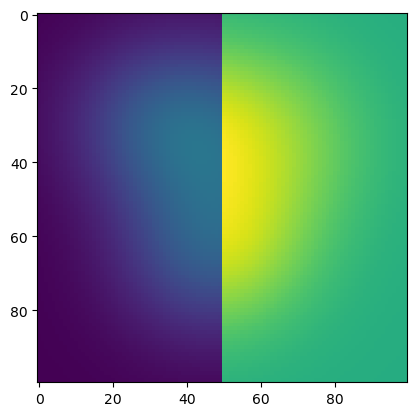

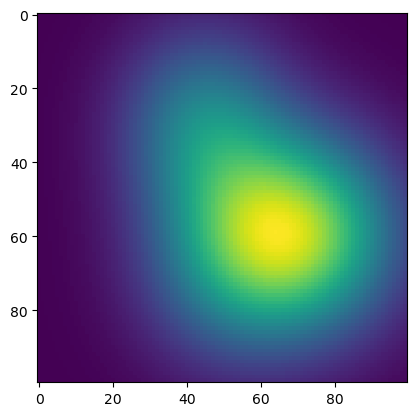

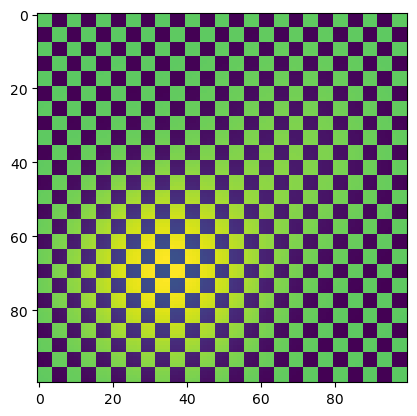

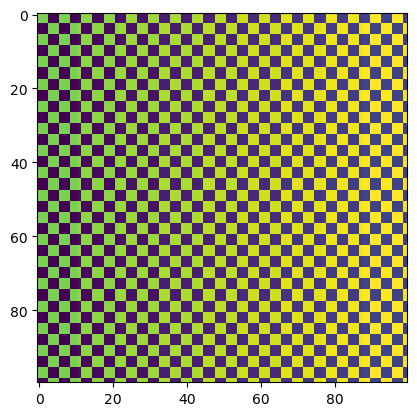

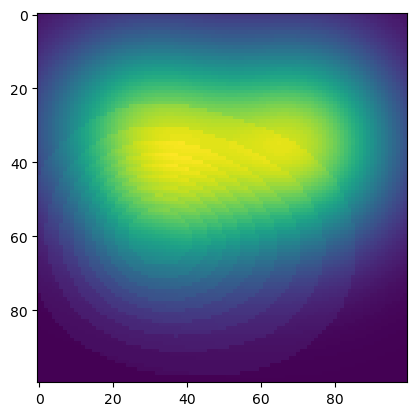

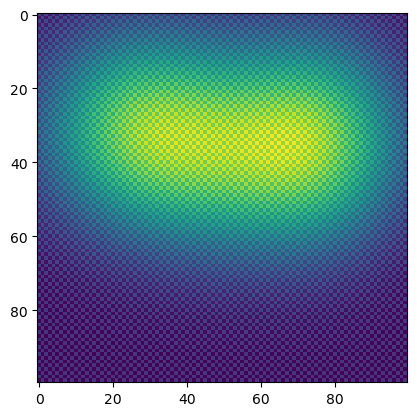

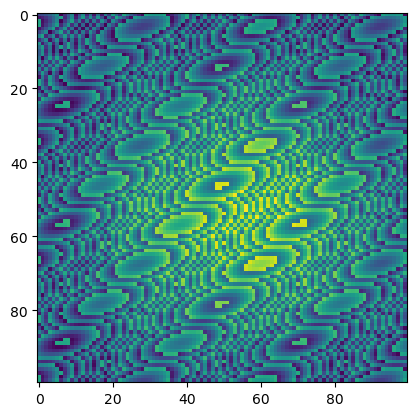

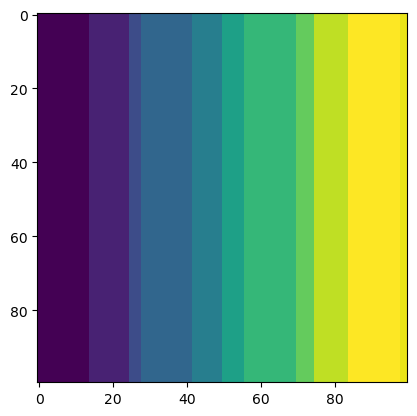

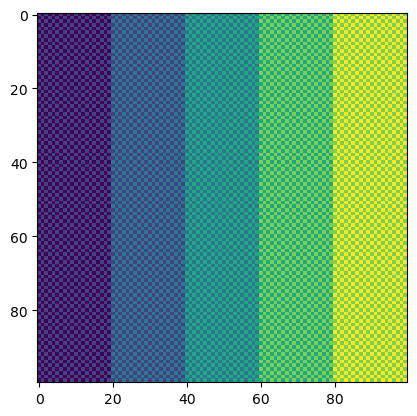

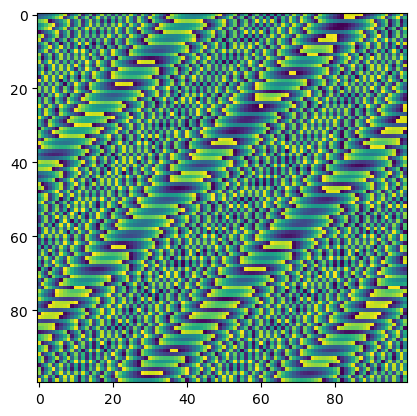

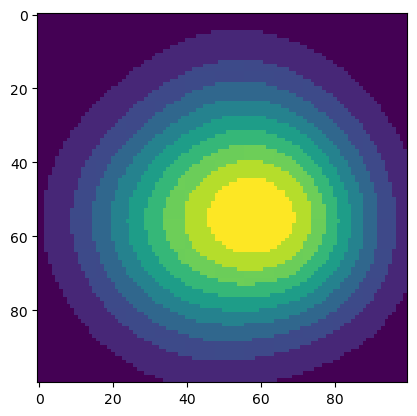

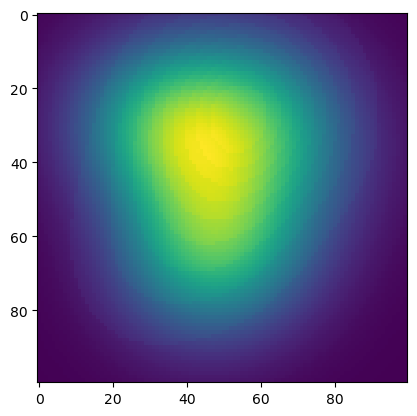

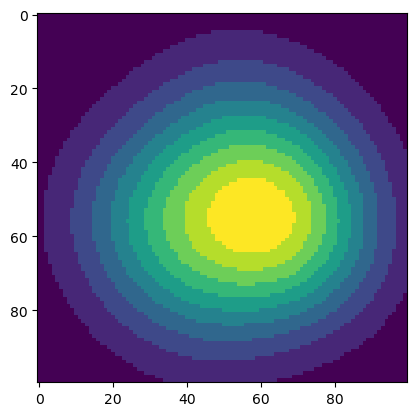

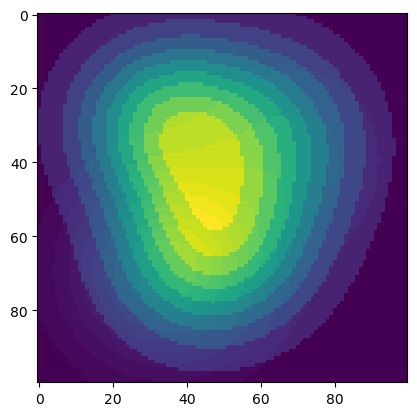

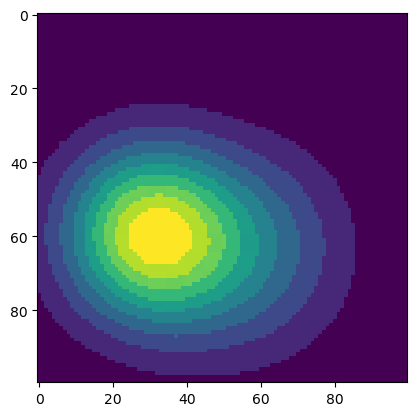

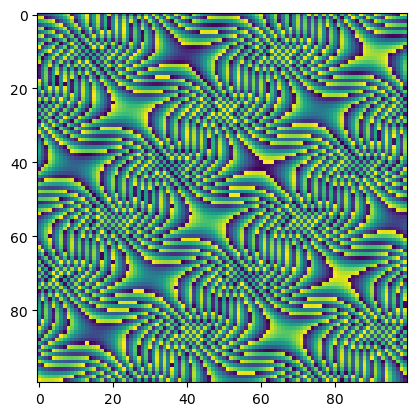

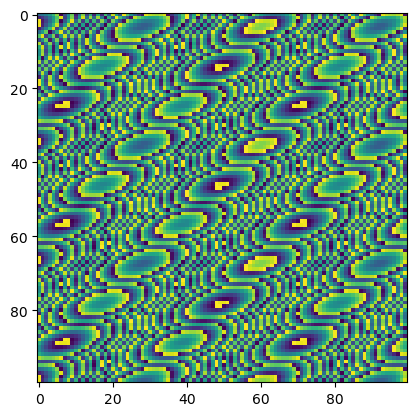

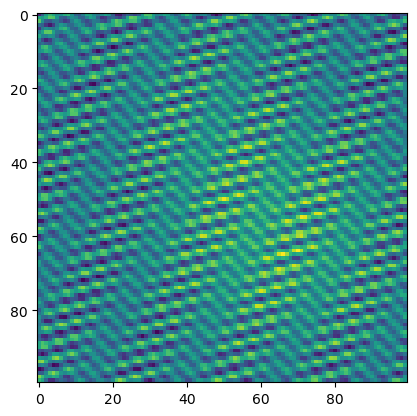

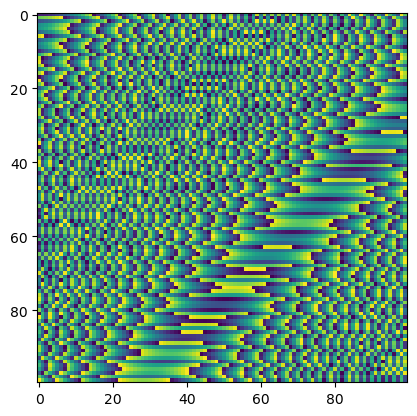

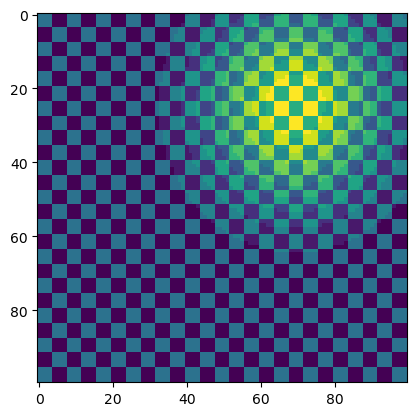

In [92]:
#Combining Images through addition with rando brightnesses-
listlen=len(imageset)-1
for i in range(20):
    newim=1/random.randint(1,10)*imageset[random.randint(0,listlen)][:100,:100]+1/random.randint(1,10)*imageset[random.randint(0,listlen)][:100,:100]
    plt.imshow(newim)
    plt.show()
    newim=newim/np.max(newim)*255
    InputImList.append(newim.astype(np.uint8))
    
#InputImList Can then be saved again with additional images, with count adjusted to the length of the imageset if the list has been reset. 